In [1]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
# @Time    : 2020/1/13 16:28
# @Author  : Shark
# @Site    :
# @File    : tsts_trainer.py
# @Software: PyCharm

import os
os.environ["CUDA_VISIBLE_DEVICES"] = "1"
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import tensorflow as tf

print(tf.__version__)
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

# On CPU/GPU placement
config = tf.compat.v1.ConfigProto(allow_soft_placement=True, log_device_placement=True)
config.gpu_options.allow_growth = True
tf.compat.v1.Session(config=config)

2.0.0
Num GPUs Available:  1
Device mapping:
/job:localhost/replica:0/task:0/device:XLA_CPU:0 -> device: XLA_CPU device
/job:localhost/replica:0/task:0/device:XLA_GPU:0 -> device: XLA_GPU device
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: TITAN RTX, pci bus id: 0000:05:00.0, compute capability: 7.5



In [2]:
from kashgari.trainer.sampler_multi_task_trainer import SamplerMultiTaskTrainer
from kashgari.task import ReadabilityTask, NerTask, AlluSourceTask,AlluClassTask
from kashgari.processors import ClassificationProcessor, LabelingProcessor

poem_seq_len = 30
task_list = []


processor = ClassificationProcessor(vocab_path="../pretrained_embedding/bert/poem_chinese_L-12_H-768_A-12/")
allu_source_task = AlluSourceTask(processor,
                                  "./allusion_corpus",
                                  poem_seq_len,
                                  num_samples=30000)
task_list.append(allu_source_task)

Device mapping:
/job:localhost/replica:0/task:0/device:XLA_CPU:0 -> device: XLA_CPU device
/job:localhost/replica:0/task:0/device:XLA_GPU:0 -> device: XLA_GPU device
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: TITAN RTX, pci bus id: 0000:05:00.0, compute capability: 7.5



In [3]:
allu_def_seq_len = poem_seq_len
trainer = SamplerMultiTaskTrainer(task_list=task_list,
                                  batch_size=64,
                                  total_epochs=50,
                                  poem_seq_len=poem_seq_len,
                                  allu_def_seq_len=allu_def_seq_len)

final_res = trainer.train()

I:BASE TASK:[base_task.:270]:Task ALLU_SOURCE:
I:BASE TASK:[base_task.:271]:	64 training batches
I:BASE TASK:[base_task.:272]:	12 validation batches
I:BASE TASK:[base_task.:273]:	94 test batches
I:BERT EMBEDDING:[bert_embed:105]:seq_len:30
I:BERT EMBEDDING:[bert_embed:105]:seq_len:30
I:AHMTL MODEL:[AHMTL.py:126]:Multi-Task Learning Model has been instantiated.
I:CUR_SPLIT:0:[sampler_mu: 92]:Set up ready. Begining training/validation.
I:BASE-MODEL:[base_model:133]:ALLU_SOURCE's model_dir is ./model_ckpt/2020-02-04-02_28_24/0/ALLU_SOURCE-NaiveDenseModel
I:BASE-MODEL:[base_model:232]:[ALLU_SOURCE]:train info:Train on 4080 samples, validate on 720 samples


Epoch 1/50
64/64 [==============================] - 97s 2s/step - task_name: ALLU_SOURCE - loss: 0.7200 - accuracy: 0.5291 - val_loss: 0.7619 - val_accuracy: 0.4492


I:CUR_SPLIT:0:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 2/50
64/64 [==============================] - 27s 415ms/step - task_name: ALLU_SOURCE - loss: 0.7239 - accuracy: 0.4758 - val_loss: 0.7641 - val_accuracy: 0.4531


I:CUR_SPLIT:0:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 3/50
64/64 [==============================] - 30s 472ms/step - task_name: ALLU_SOURCE - loss: 0.7106 - accuracy: 0.4910 - val_loss: 0.7606 - val_accuracy: 0.3789


I:CUR_SPLIT:0:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 4/50
64/64 [==============================] - 32s 500ms/step - task_name: ALLU_SOURCE - loss: 0.7045 - accuracy: 0.4822 - val_loss: 0.7668 - val_accuracy: 0.4297


I:CUR_SPLIT:0:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 5/50
64/64 [==============================] - 35s 540ms/step - task_name: ALLU_SOURCE - loss: 0.7023 - accuracy: 0.4890 - val_loss: 0.7689 - val_accuracy: 0.3320


I:CUR_SPLIT:0:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 6/50
64/64 [==============================] - 35s 544ms/step - task_name: ALLU_SOURCE - loss: 0.7019 - accuracy: 0.5012 - val_loss: 0.7671 - val_accuracy: 0.3490


I:CUR_SPLIT:0:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 7/50
64/64 [==============================] - 34s 539ms/step - task_name: ALLU_SOURCE - loss: 0.7038 - accuracy: 0.4919 - val_loss: 0.7774 - val_accuracy: 0.3112


I:CUR_SPLIT:0:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 8/50
64/64 [==============================] - 23s 356ms/step - task_name: ALLU_SOURCE - loss: 0.7022 - accuracy: 0.4895 - val_loss: 0.7704 - val_accuracy: 0.3776


I:CUR_SPLIT:0:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 9/50
64/64 [==============================] - 22s 347ms/step - task_name: ALLU_SOURCE - loss: 0.6999 - accuracy: 0.4988 - val_loss: 0.7839 - val_accuracy: 0.4466


I:CUR_SPLIT:0:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 10/50
64/64 [==============================] - 23s 362ms/step - task_name: ALLU_SOURCE - loss: 0.6995 - accuracy: 0.5010 - val_loss: 0.7734 - val_accuracy: 0.4883


I:CUR_SPLIT:0:[sampler_mu:139]:----------------------------------------------------------------------------------------------------
I:SAMPLE_TRAINER:[sampler_mu: 43]:cur_split_idx 0th END
I:SAMPLE_TRAINER:[sampler_mu: 44]:****************************************************************************************************
I:SAMPLE_TRAINER:[sampler_mu: 45]:****************************************************************************************************
I:BASE TASK:[base_task.:270]:Task ALLU_SOURCE:
I:BASE TASK:[base_task.:271]:	64 training batches
I:BASE TASK:[base_task.:272]:	12 validation batches
I:BASE TASK:[base_task.:273]:	94 test batches


example:**************************************************
x_seq:战 余 能 送 阵 , 身 老 未 封 侯 。 [UNK] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
x_ALLU:李 典 字 曼 成 , 山 阳 钜 野 人 也 。 [UNK] [UNK] 时 太 祖 与 袁 绍 相 拒 官 渡 , 典 率 宗
y_pred:[0.5210489]
y_true:1
----------
x_seq:战 余 能 送 阵 , 身 老 未 封 侯 。 [UNK] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
x_ALLU:圆 随 汉 东 蚌 , 晕 逐 淮 南 灰 。 [UNK] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
y_pred:[0.52104515]
y_true:0
----------
x_seq:战 余 能 送 阵 , 身 老 未 封 侯 。 [UNK] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
x_ALLU:属 广 陵 相 陈 敏 反 , 南 渡 江 [UNK] [UNK] 有 孙 氏 鼎 峙 之 计 。 假 荣 右 将 军 、 丹 阳
y_pred:[0.5210478]
y_true:0
----------
x_seq:战 余 能 送 阵 , 身 老 未 封 侯 。 [UNK] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
x_ALLU:《 越 绝 书 》

I:BERT EMBEDDING:[bert_embed:105]:seq_len:30
I:BERT EMBEDDING:[bert_embed:105]:seq_len:30
I:AHMTL MODEL:[AHMTL.py:126]:Multi-Task Learning Model has been instantiated.
I:CUR_SPLIT:1:[sampler_mu: 92]:Set up ready. Begining training/validation.
I:BASE-MODEL:[base_model:133]:ALLU_SOURCE's model_dir is ./model_ckpt/2020-02-04-02_28_24/1/ALLU_SOURCE-NaiveDenseModel
I:BASE-MODEL:[base_model:232]:[ALLU_SOURCE]:train info:Train on 4080 samples, validate on 720 samples


Epoch 1/50
64/64 [==============================] - 98s 2s/step - task_name: ALLU_SOURCE - loss: 0.7163 - accuracy: 0.5481 - val_loss: 0.7045 - val_accuracy: 0.6146


I:CUR_SPLIT:1:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 2/50
64/64 [==============================] - 38s 593ms/step - task_name: ALLU_SOURCE - loss: 0.6510 - accuracy: 0.6069 - val_loss: 0.6931 - val_accuracy: 0.6068


I:CUR_SPLIT:1:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 3/50
64/64 [==============================] - 38s 598ms/step - task_name: ALLU_SOURCE - loss: 0.6126 - accuracy: 0.6599 - val_loss: 0.6917 - val_accuracy: 0.5938


I:CUR_SPLIT:1:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 4/50
64/64 [==============================] - 33s 519ms/step - task_name: ALLU_SOURCE - loss: 0.5889 - accuracy: 0.6826 - val_loss: 0.6951 - val_accuracy: 0.6159


I:CUR_SPLIT:1:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 5/50
64/64 [==============================] - 30s 470ms/step - task_name: ALLU_SOURCE - loss: 0.6041 - accuracy: 0.6748 - val_loss: 0.7444 - val_accuracy: 0.5495


I:CUR_SPLIT:1:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 6/50
64/64 [==============================] - 25s 392ms/step - task_name: ALLU_SOURCE - loss: 0.5999 - accuracy: 0.6724 - val_loss: 0.7110 - val_accuracy: 0.6133


I:CUR_SPLIT:1:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 7/50
64/64 [==============================] - 40s 627ms/step - task_name: ALLU_SOURCE - loss: 0.5516 - accuracy: 0.7124 - val_loss: 0.6819 - val_accuracy: 0.6224


I:CUR_SPLIT:1:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 8/50
64/64 [==============================] - 33s 509ms/step - task_name: ALLU_SOURCE - loss: 0.5019 - accuracy: 0.7517 - val_loss: 0.6824 - val_accuracy: 0.6458


I:CUR_SPLIT:1:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 9/50
64/64 [==============================] - 33s 520ms/step - task_name: ALLU_SOURCE - loss: 0.4733 - accuracy: 0.7727 - val_loss: 0.6970 - val_accuracy: 0.6549


I:CUR_SPLIT:1:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 10/50
64/64 [==============================] - 32s 496ms/step - task_name: ALLU_SOURCE - loss: 0.4492 - accuracy: 0.7915 - val_loss: 0.6851 - val_accuracy: 0.6523


I:CUR_SPLIT:1:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 11/50
64/64 [==============================] - 35s 541ms/step - task_name: ALLU_SOURCE - loss: 0.4092 - accuracy: 0.8154 - val_loss: 0.7068 - val_accuracy: 0.6745


I:CUR_SPLIT:1:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 12/50
64/64 [==============================] - 33s 523ms/step - task_name: ALLU_SOURCE - loss: 0.3771 - accuracy: 0.8354 - val_loss: 0.7179 - val_accuracy: 0.6771


I:CUR_SPLIT:1:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 13/50
64/64 [==============================] - 31s 485ms/step - task_name: ALLU_SOURCE - loss: 0.3648 - accuracy: 0.8462 - val_loss: 0.7555 - val_accuracy: 0.6810


I:CUR_SPLIT:1:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 14/50
64/64 [==============================] - 32s 507ms/step - task_name: ALLU_SOURCE - loss: 0.3416 - accuracy: 0.8513 - val_loss: 0.7940 - val_accuracy: 0.6810


I:CUR_SPLIT:1:[sampler_mu:139]:----------------------------------------------------------------------------------------------------
I:SAMPLE_TRAINER:[sampler_mu: 43]:cur_split_idx 1th END
I:SAMPLE_TRAINER:[sampler_mu: 44]:****************************************************************************************************
I:SAMPLE_TRAINER:[sampler_mu: 45]:****************************************************************************************************
I:BASE TASK:[base_task.:270]:Task ALLU_SOURCE:
I:BASE TASK:[base_task.:271]:	64 training batches
I:BASE TASK:[base_task.:272]:	12 validation batches
I:BASE TASK:[base_task.:273]:	94 test batches


example:**************************************************
x_seq:清 洛 饮 冰 添 苦 节 , 碧 嵩 看 雪 助 高 情 。 [UNK] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
x_ALLU:晨 朝 受 诏 , 暮 夕 饮 冰 , 足 明 怖 惧 忧 愁 , 内 心 熏 灼 , 询 道 情 切 , 达 照
y_pred:[0.4713068]
y_true:1
----------
x_seq:清 洛 饮 冰 添 苦 节 , 碧 嵩 看 雪 助 高 情 。 [UNK] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
x_ALLU:陈 [UNK] 字 仲 弓 , 颍 川 许 人 也 。 出 于 单 微 。 自 为 儿 童 , 虽 在 戏 弄 , 为 等
y_pred:[0.40438986]
y_true:0
----------
x_seq:清 洛 饮 冰 添 苦 节 , 碧 嵩 看 雪 助 高 情 。 [UNK] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
x_ALLU:侧 席 谓 不 正 坐 , 所 以 待 贤 良 也 [UNK] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
y_pred:[0.29510292]
y_true:0
----------
x_seq:清 洛 饮 冰 添 苦 节 , 碧 嵩 看 雪 助 高 情 。 [UNK] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
x_ALLU:按 , 《 家 语 》 [UNK] 孔 子 遇 程 子 于 途 , 倾 盖 而 语 [UNK] [UNK] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD

I:BERT EMBEDDING:[bert_embed:105]:seq_len:30
I:BERT EMBEDDING:[bert_embed:105]:seq_len:30
I:AHMTL MODEL:[AHMTL.py:126]:Multi-Task Learning Model has been instantiated.
I:CUR_SPLIT:2:[sampler_mu: 92]:Set up ready. Begining training/validation.
I:BASE-MODEL:[base_model:133]:ALLU_SOURCE's model_dir is ./model_ckpt/2020-02-04-02_28_24/2/ALLU_SOURCE-NaiveDenseModel
I:BASE-MODEL:[base_model:232]:[ALLU_SOURCE]:train info:Train on 4080 samples, validate on 720 samples


Epoch 1/50
64/64 [==============================] - 104s 2s/step - task_name: ALLU_SOURCE - loss: 0.7105 - accuracy: 0.5530 - val_loss: 0.7286 - val_accuracy: 0.6029


I:CUR_SPLIT:2:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 2/50
64/64 [==============================] - 73s 1s/step - task_name: ALLU_SOURCE - loss: 0.6402 - accuracy: 0.6279 - val_loss: 0.7143 - val_accuracy: 0.6120


I:CUR_SPLIT:2:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 3/50
64/64 [==============================] - 29s 453ms/step - task_name: ALLU_SOURCE - loss: 0.6114 - accuracy: 0.6548 - val_loss: 0.7013 - val_accuracy: 0.6380


I:CUR_SPLIT:2:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 4/50
64/64 [==============================] - 21s 334ms/step - task_name: ALLU_SOURCE - loss: 0.5577 - accuracy: 0.7017 - val_loss: 0.7285 - val_accuracy: 0.6419


I:CUR_SPLIT:2:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 5/50
64/64 [==============================] - 29s 458ms/step - task_name: ALLU_SOURCE - loss: 0.5562 - accuracy: 0.7122 - val_loss: 0.6956 - val_accuracy: 0.6628


I:CUR_SPLIT:2:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 6/50
64/64 [==============================] - 22s 338ms/step - task_name: ALLU_SOURCE - loss: 0.4895 - accuracy: 0.7595 - val_loss: 0.7158 - val_accuracy: 0.6810


I:CUR_SPLIT:2:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 7/50
64/64 [==============================] - 22s 346ms/step - task_name: ALLU_SOURCE - loss: 0.4494 - accuracy: 0.7898 - val_loss: 0.7562 - val_accuracy: 0.6862


I:CUR_SPLIT:2:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 8/50
64/64 [==============================] - 22s 344ms/step - task_name: ALLU_SOURCE - loss: 0.4150 - accuracy: 0.8105 - val_loss: 0.7583 - val_accuracy: 0.6966


I:CUR_SPLIT:2:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 9/50
64/64 [==============================] - 22s 342ms/step - task_name: ALLU_SOURCE - loss: 0.3727 - accuracy: 0.8381 - val_loss: 0.8587 - val_accuracy: 0.6888


I:CUR_SPLIT:2:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 10/50
64/64 [==============================] - 31s 484ms/step - task_name: ALLU_SOURCE - loss: 0.3676 - accuracy: 0.8416 - val_loss: 0.8572 - val_accuracy: 0.6680


I:CUR_SPLIT:2:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 11/50
64/64 [==============================] - 33s 515ms/step - task_name: ALLU_SOURCE - loss: 0.3460 - accuracy: 0.8445 - val_loss: 0.8160 - val_accuracy: 0.6875


I:CUR_SPLIT:2:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 12/50
64/64 [==============================] - 33s 515ms/step - task_name: ALLU_SOURCE - loss: 0.3528 - accuracy: 0.8442 - val_loss: 0.7883 - val_accuracy: 0.6927


I:CUR_SPLIT:2:[sampler_mu:139]:----------------------------------------------------------------------------------------------------
I:SAMPLE_TRAINER:[sampler_mu: 43]:cur_split_idx 2th END
I:SAMPLE_TRAINER:[sampler_mu: 44]:****************************************************************************************************
I:SAMPLE_TRAINER:[sampler_mu: 45]:****************************************************************************************************
I:BASE TASK:[base_task.:270]:Task ALLU_SOURCE:
I:BASE TASK:[base_task.:271]:	64 training batches
I:BASE TASK:[base_task.:272]:	12 validation batches
I:BASE TASK:[base_task.:273]:	94 test batches


example:**************************************************
x_seq:宫 买 长 门 赋 , 天 迎 驷 马 车 。 [UNK] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
x_ALLU:《 九 辩 》 者 , 楚 大 夫 宋 玉 之 所 作 也 。 [UNK] [UNK] 宋 玉 者 , 屈 原 弟 子 也 , 闵
y_pred:[0.9846679]
y_true:1
----------
x_seq:宫 买 长 门 赋 , 天 迎 驷 马 车 。 [UNK] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
x_ALLU:长 子 芝 , 字 伯 英 , 最 知 名 。 [UNK] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
y_pred:[0.42013112]
y_true:0
----------
x_seq:宫 买 长 门 赋 , 天 迎 驷 马 车 。 [UNK] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
x_ALLU:《 春 秋 合 诚 图 》 云 [UNK] 少 微 , 处 士 位 。 [UNK] 又 《 天 官 占 》 云 [UNK] 少 微 , 一
y_pred:[0.43237478]
y_true:0
----------
x_seq:宫 买 长 门 赋 , 天 迎 驷 马 车 。 [UNK] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
x_ALLU:严 助 

I:BERT EMBEDDING:[bert_embed:105]:seq_len:30
I:BERT EMBEDDING:[bert_embed:105]:seq_len:30
I:AHMTL MODEL:[AHMTL.py:126]:Multi-Task Learning Model has been instantiated.
I:CUR_SPLIT:3:[sampler_mu: 92]:Set up ready. Begining training/validation.
I:BASE-MODEL:[base_model:133]:ALLU_SOURCE's model_dir is ./model_ckpt/2020-02-04-02_28_24/3/ALLU_SOURCE-NaiveDenseModel
I:BASE-MODEL:[base_model:232]:[ALLU_SOURCE]:train info:Train on 4080 samples, validate on 720 samples


Epoch 1/50
64/64 [==============================] - 93s 1s/step - task_name: ALLU_SOURCE - loss: 0.7285 - accuracy: 0.5388 - val_loss: 0.7343 - val_accuracy: 0.5794


I:CUR_SPLIT:3:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 2/50
64/64 [==============================] - 34s 531ms/step - task_name: ALLU_SOURCE - loss: 0.6438 - accuracy: 0.6243 - val_loss: 0.7018 - val_accuracy: 0.6042


I:CUR_SPLIT:3:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 3/50
64/64 [==============================] - 39s 610ms/step - task_name: ALLU_SOURCE - loss: 0.6037 - accuracy: 0.6714 - val_loss: 0.6850 - val_accuracy: 0.6276


I:CUR_SPLIT:3:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 4/50
64/64 [==============================] - 39s 602ms/step - task_name: ALLU_SOURCE - loss: 0.5652 - accuracy: 0.7024 - val_loss: 0.6763 - val_accuracy: 0.6406


I:CUR_SPLIT:3:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 5/50
64/64 [==============================] - 32s 503ms/step - task_name: ALLU_SOURCE - loss: 0.5110 - accuracy: 0.7485 - val_loss: 0.7021 - val_accuracy: 0.6380


I:CUR_SPLIT:3:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 6/50
64/64 [==============================] - 33s 522ms/step - task_name: ALLU_SOURCE - loss: 0.4652 - accuracy: 0.7900 - val_loss: 0.7136 - val_accuracy: 0.6680


I:CUR_SPLIT:3:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 7/50
64/64 [==============================] - 33s 511ms/step - task_name: ALLU_SOURCE - loss: 0.4242 - accuracy: 0.8081 - val_loss: 0.7736 - val_accuracy: 0.6680


I:CUR_SPLIT:3:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 8/50
64/64 [==============================] - 34s 528ms/step - task_name: ALLU_SOURCE - loss: 0.3857 - accuracy: 0.8245 - val_loss: 0.8066 - val_accuracy: 0.6732


I:CUR_SPLIT:3:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 9/50
64/64 [==============================] - 32s 501ms/step - task_name: ALLU_SOURCE - loss: 0.3654 - accuracy: 0.8430 - val_loss: 0.8581 - val_accuracy: 0.6836


I:CUR_SPLIT:3:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 10/50
64/64 [==============================] - 35s 542ms/step - task_name: ALLU_SOURCE - loss: 0.3314 - accuracy: 0.8616 - val_loss: 0.9292 - val_accuracy: 0.6745


I:CUR_SPLIT:3:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 11/50
64/64 [==============================] - 34s 525ms/step - task_name: ALLU_SOURCE - loss: 0.2973 - accuracy: 0.8757 - val_loss: 0.9697 - val_accuracy: 0.6732


I:CUR_SPLIT:3:[sampler_mu:139]:----------------------------------------------------------------------------------------------------
I:SAMPLE_TRAINER:[sampler_mu: 43]:cur_split_idx 3th END
I:SAMPLE_TRAINER:[sampler_mu: 44]:****************************************************************************************************
I:SAMPLE_TRAINER:[sampler_mu: 45]:****************************************************************************************************
I:BASE TASK:[base_task.:270]:Task ALLU_SOURCE:
I:BASE TASK:[base_task.:271]:	64 training batches
I:BASE TASK:[base_task.:272]:	12 validation batches
I:BASE TASK:[base_task.:273]:	94 test batches


example:**************************************************
x_seq:自 洛 非 才 子 , 游 梁 得 主 人 。 [UNK] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
x_ALLU:孝 武 皇 帝 陈 皇 后 时 得 幸 , 颇 妒 , 别 在 长 门 宫 , 愁 闷 悲 思 。 闻 蜀 郡 成
y_pred:[0.96603084]
y_true:1
----------
x_seq:自 洛 非 才 子 , 游 梁 得 主 人 。 [UNK] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
x_ALLU:季 龙 十 三 子 , 五 人 为 冉 闵 所 杀 。 [UNK] [UNK] 至 是 终 为 闵 所 灭 。 [UNK] [PAD] [PAD] [PAD] [PAD]
y_pred:[0.11204997]
y_true:0
----------
x_seq:自 洛 非 才 子 , 游 梁 得 主 人 。 [UNK] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
x_ALLU:楚 文 王 伐 申 , 过 邓 。 邓 祁 侯 曰 : [UNK] 吾 甥 也 。 [UNK] 止 而 享 之 。 [UNK] 甥 、 甥
y_pred:[0.09014705]
y_true:0
----------
x_seq:自 洛 非 才 子 , 游 梁 得 主 人 。 [UNK] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
x_ALLU:终 军 字 子 云 , 济 南 人 也 。 少 好 学 , 以 辩 博 能 属 文 闻 于 郡 中 。

I:BERT EMBEDDING:[bert_embed:105]:seq_len:30
I:BERT EMBEDDING:[bert_embed:105]:seq_len:30
I:AHMTL MODEL:[AHMTL.py:126]:Multi-Task Learning Model has been instantiated.
I:CUR_SPLIT:4:[sampler_mu: 92]:Set up ready. Begining training/validation.
I:BASE-MODEL:[base_model:133]:ALLU_SOURCE's model_dir is ./model_ckpt/2020-02-04-02_28_24/4/ALLU_SOURCE-NaiveDenseModel
I:BASE-MODEL:[base_model:232]:[ALLU_SOURCE]:train info:Train on 4080 samples, validate on 720 samples


Epoch 1/50
64/64 [==============================] - 101s 2s/step - task_name: ALLU_SOURCE - loss: 0.7066 - accuracy: 0.5508 - val_loss: 0.7127 - val_accuracy: 0.5807


I:CUR_SPLIT:4:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 2/50
64/64 [==============================] - 39s 611ms/step - task_name: ALLU_SOURCE - loss: 0.6451 - accuracy: 0.6211 - val_loss: 0.6998 - val_accuracy: 0.6042


I:CUR_SPLIT:4:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 3/50
64/64 [==============================] - 38s 591ms/step - task_name: ALLU_SOURCE - loss: 0.6156 - accuracy: 0.6572 - val_loss: 0.6863 - val_accuracy: 0.6302


I:CUR_SPLIT:4:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 4/50
64/64 [==============================] - 36s 561ms/step - task_name: ALLU_SOURCE - loss: 0.5976 - accuracy: 0.6758 - val_loss: 0.6858 - val_accuracy: 0.6302


I:CUR_SPLIT:4:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 5/50
64/64 [==============================] - 33s 523ms/step - task_name: ALLU_SOURCE - loss: 0.5523 - accuracy: 0.7153 - val_loss: 0.6954 - val_accuracy: 0.6211


I:CUR_SPLIT:4:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 6/50
64/64 [==============================] - 33s 511ms/step - task_name: ALLU_SOURCE - loss: 0.6861 - accuracy: 0.5396 - val_loss: 0.7696 - val_accuracy: 0.5026


I:CUR_SPLIT:4:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 7/50
64/64 [==============================] - 33s 518ms/step - task_name: ALLU_SOURCE - loss: 0.7055 - accuracy: 0.4954 - val_loss: 0.7538 - val_accuracy: 0.5000


I:CUR_SPLIT:4:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 8/50
63/64 [============================>.] - ETA: 0s - task_name: ALLU_SOURCE - loss: 0.7165 - accuracy: 0.5017
Epoch 00008: ReduceLROnPlateau reducing learning rate to 0.0007000000332482159.
64/64 [==============================] - 34s 530ms/step - task_name: ALLU_SOURCE - loss: 0.7042 - accuracy: 0.4995 - val_loss: 0.7493 - val_accuracy: 0.4180


I:CUR_SPLIT:4:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 9/50
64/64 [==============================] - 35s 554ms/step - task_name: ALLU_SOURCE - loss: 0.6990 - accuracy: 0.5232 - val_loss: 0.7520 - val_accuracy: 0.4701


I:CUR_SPLIT:4:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 10/50
64/64 [==============================] - 32s 506ms/step - task_name: ALLU_SOURCE - loss: 0.6990 - accuracy: 0.5073 - val_loss: 0.7506 - val_accuracy: 0.4479


I:CUR_SPLIT:4:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 11/50
63/64 [============================>.] - ETA: 0s - task_name: ALLU_SOURCE - loss: 0.7041 - accuracy: 0.5062
Epoch 00011: ReduceLROnPlateau reducing learning rate to 0.0004900000232737511.
64/64 [==============================] - 36s 556ms/step - task_name: ALLU_SOURCE - loss: 0.7001 - accuracy: 0.5056 - val_loss: 0.7503 - val_accuracy: 0.3854


I:CUR_SPLIT:4:[sampler_mu:139]:----------------------------------------------------------------------------------------------------
I:SAMPLE_TRAINER:[sampler_mu: 43]:cur_split_idx 4th END
I:SAMPLE_TRAINER:[sampler_mu: 44]:****************************************************************************************************
I:SAMPLE_TRAINER:[sampler_mu: 45]:****************************************************************************************************


example:**************************************************
x_seq:音 容 想 在 眼 , 暂 若 升 琴 堂 。 [UNK] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
x_ALLU:宓 不 齐 字 子 贱 。 少 孔 子 三 十 岁 。 [UNK] [UNK] 子 贱 为 单 父 宰 , 反 命 于 孔 子 ,
y_pred:[0.36270493]
y_true:1
----------
x_seq:音 容 想 在 眼 , 暂 若 升 琴 堂 。 [UNK] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
x_ALLU:顾 恺 之 字 长 康 , [UNK] [UNK] 桓 温 引 为 大 司 马 参 军 。 [UNK] [UNK] 尤 善 丹 青 , 图 写 特
y_pred:[0.27149266]
y_true:0
----------
x_seq:音 容 想 在 眼 , 暂 若 升 琴 堂 。 [UNK] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
x_ALLU:樯 偃 落 金 乌 , 舟 倾 没 犀 [UNK] 。 [UNK] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
y_pred:[0.4512718]
y_true:0
----------
x_seq:音 容 想 在 眼 , 暂 若 升 琴 堂 。 [UNK] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
x_A

In [4]:
from kashgari.utils import compute_mean_metrics
from kashgari.utils import plot_final_res

ALLU_SOURCE	0.4893902116402117


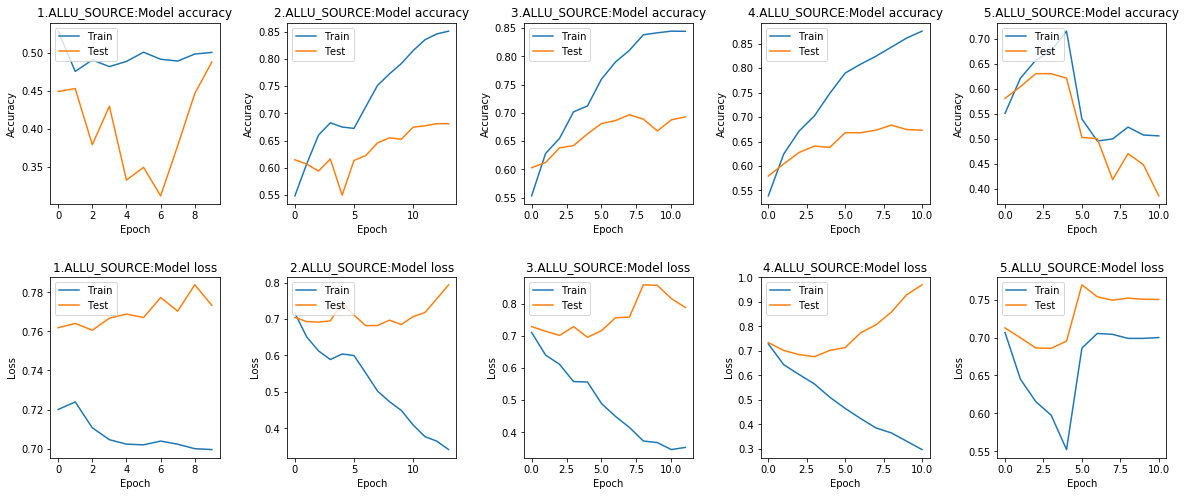

In [5]:
compute_mean_metrics(final_res)
plot_final_res(final_res)